# CHAPTER 14 데이터 분석 예제

##### 책에서 사용한 예제 데이터셋은 이 책의 깃허브 저장소에서 다운로드 할 수 있다.
- 깃허브 저장소
##### http://github.com/wesm/pydata-book

### 14.1 Bit.ly의 1.USA.gov 데이터

In [ ]:
# 이 책을 쓰는 현재 해당 서비스는 더 이상 존재하지 않지만 그 데이터 파일 줄 하나를 살펴보자.
# 매 시간별 스냅샷 파일의 각 로우는 웹 데이터 형식으로 흔히 사용되는 JSON(JavaScript Object Notation)이다.
# 스냅샷 파일의 첫 줄을 열어보면 다음과 비슷한 내용을 확인할 수 있다.

In [7]:
import json
path = 'data/pydata-book-2nd-edition/datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path, 'r', encoding='UTF-8')]

open(path).readline()

# 파이썬에는 JSON 문자열을 파이썬 사전 객체로 바꿔주는 다양한 내장 모듈과 서드파티 모듈이 있다.
# 여기서는 json 모듈의 loads 함수를 이용해서 내려받은 샘플 파일을 한 줄씩 읽는다.

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [8]:
# 결과를 담고 있는 records 객체는 파이썬 사전의 리스트다

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### 14.1.1 순수 파이썬으로 표준시간대 세어보기

In [9]:
# 이 데이터에서 가장 빈도가 높은 표준시간대(tz 필드)를 구한다. -> 다양한 방법이 있지만, 
# -> 먼저 list 표기법을 사용해서 표준시간대의 목록을 가져오자

time_zones = [rec['tz'] for rec in records]

# 하지만 records의 아이템이 모두 표준시간대 필드가 가지고 있는게 아니라는게 드러났다!
# -> 이 문제는 if 'tz' in rec 을 리스트 표기법 뒤에 추가해서 tz 필드가 있는지 검사하면 쉽게 해결할 수 있다.

KeyError: 'tz'

In [10]:
# 위 소스의 뒷부분에 if 'tz' in rec 추가.

time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [11]:
time_zones[:10]

# 상위 10개의 표준시간대를 보면 그중 몇 개는 비어 있어서 뭔지 알 수 없다.
# -> 비어있는 필드를 제거할 수도 있지만, 일단은 그냥 두고 표준시간대를 세어보자

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [12]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

# 파이썬 표준 라이브러리에 익숙하다면 다음처럼 좀 더 간단하게 작성할 수도 있다.

In [13]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 값이 0으로 초기화된다.
    for x in sequence:
        counts[x] += 1
    return counts

# 재사용이 쉽도록 이 로직을 함수로 만들고 위 함수에 time_zone 리스트를 넘겨서 사용하자.

In [14]:
counts = get_counts(time_zones)

In [15]:
counts['America/New_York']

1251

In [16]:
len(time_zones)

3440

In [17]:
# 가장 많이 등장하는 상위 10개의 표준시간대를 알고 싶다면 좀 더 세련된 방법으로 사전을 사용하면 된다.

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [18]:
# 이제 상위 10개의 표준시간대를 구했다
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [19]:
# 파이썬 표준 라이브러리의 collections.Counter 클래스를 이용하면 지금까지 했던 작업을 훨씬 쉽게 할 수 있다.
from collections import Counter

In [20]:
counts = Counter(time_zones)

In [21]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 14.1.2 pandas로 표준시간대 세어보기

In [22]:
# records를 가지고 DataFrame을 만드는 방법은 아주 쉽다. 
# 그냥 레코드가 담긴 리스트를 pandas.DataFrame으로 넘기면 된다.
import pandas as pd

In [23]:
frame = pd.DataFrame(records)

In [24]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [25]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [26]:
# frame의 출력 결과는 거대한 DataFrame 객체의 요약 정보다.
# frame['tz']에서 반환되는 Series 객체의 value_counts 메서드를 이용해서 시간대를 세어볼 수 있다.

tz_counts = frame['tz'].value_counts()

In [27]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [28]:
# matplotlib 라이브러리로 이 데이터를 그래프로 그릴 수 있다.
# 그전에 records에서 비어 있는 표준시간대를 다른 이름으로 바꿔보자.
# fillna 함수로 빠진 값을 대체하고, 블리언 배열 색인을 이용해서 비어 있는 값을 대체할 수 있다.

clean_tz = frame['tz'].fillna('Missing')

In [29]:
clean_tz[clean_tz == ''] = 'Unknown'

In [30]:
tz_counts = clean_tz.value_counts()

In [31]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [32]:
# 여기서는 seaborn 패키지를 이용해서 수평막대그래프를 그려보자
import seaborn as sns

In [33]:
subset = tz_counts[:10]

In [34]:
sns.barplot(y=subset.index, x=subset.values)

<AxesSubplot:>

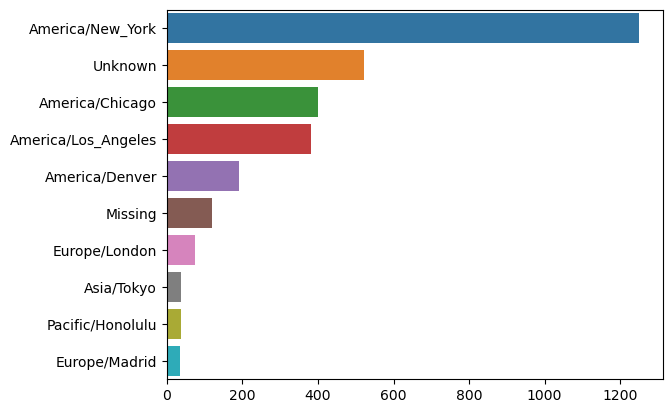

In [35]:
import matplotlib.pyplot as plt  #  -> 이부분은 책에 없음. -> 알아서 찾아서 써줬어야 함.
plt.show()

In [36]:
# a 필드에는 URL 단축을 실행하는 브라우저, 단말기, 애플리케이션에 대한 정보(User Agent 문자열)가 들어 있다.f
frame['a'][1]

'GoogleMaps/RochesterNY'

In [37]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [38]:
frame['a'][51][:50]  # 긴 문자열

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [39]:
# 'agent'라고 하는 흥미로운 문자열 정보를 분석하는 일이 어려워 보일 수도 있다.
# 한가지 가능한 전략은 문자열에서 첫 번째 토큰(브라우저의 종류를 어느 정도 알 수 있을 만큼)을 잘라내서
# -> 사용자 행동에 대한 또 다른 개요를 만든느 것이다.

results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [40]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [41]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [42]:
# 이제 표준시간대 순위표를 윈도우 사용자와 비윈도우 사용자 그룹으로 나눠보자.
# 문제를 단순화해서 agent 문자열이 'Windows'를 포함하면 윈도우 사용자라고 가정하고 
# agent 값이 없는 데이터는 다음과 같이 제외한다.
cframe = frame[frame.a.notnull()]

In [43]:
import numpy as np

cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows', 'Not Windows')

<ipython-input-43-41be0e3218f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'),


In [44]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [45]:
# 그런 다음 표준시간대와 운영체제를 기준으로 데이터를 그룹으로 묶는다.
by_tz_os = cframe.groupby(['tz', 'os'])

In [46]:
# 앞에서 살펴본 value_count 함수처럼 그룹별 합계는 size 함수로 계산할 수 있다.
# 결과는 unstack 함수를 이용해서 표로 재배치한다.
agg_counts = by_tz_os.size().unstack().fillna(0)

In [47]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [48]:
# 마지막으로 전체 표준시간대의 순위를 모아보자.
# 먼저 agg_counts를 보자
# 오름차순으로 정렬
indexer = agg_counts.sum(1).argsort()

In [49]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [50]:
# agg_counts에 take를 사용해서 로우를 정렬된 순서 그대로 선택하고 
# 마지막 10개 로우(가장 큰 값)만 잘라낸다.
count_subset = agg_counts.take(indexer[-10:])

In [51]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [52]:
# pandas에는 이와 똑같은 동작을 하는 nlargest라는 편리한 메서드가 존재한다.
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [53]:
# 그런 다음 앞에서 해본 것처럼 plot 함수에 stacked=True를 넘겨주면 데이터를 중첩막대그래프로 만들 수 있다.
count_subset = count_subset.stack()

In [54]:
count_subset.name = 'total'

In [55]:
count_subset = count_subset.reset_index()

In [56]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


In [57]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

<AxesSubplot:xlabel='total', ylabel='tz'>

In [58]:
print(count_subset)

                   tz           os  total
0   America/Sao_Paulo  Not Windows   13.0
1   America/Sao_Paulo      Windows   20.0
2       Europe/Madrid  Not Windows   16.0
3       Europe/Madrid      Windows   19.0
4    Pacific/Honolulu  Not Windows    0.0
..                ...          ...    ...
15    America/Chicago      Windows  285.0
16                     Not Windows  245.0
17                         Windows  276.0
18   America/New_York  Not Windows  339.0
19   America/New_York      Windows  912.0

[20 rows x 3 columns]


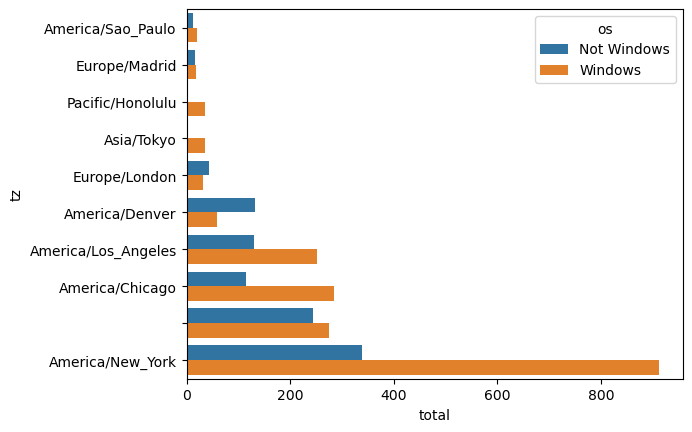

In [59]:
plt.show()

In [60]:
# 위 그래프로는 작은 그룹에서 윈도우 사용자의 상대 비율을 확인하기 어렵다.
# 하지만 각 로우에서 총합을 1로 정규화한 뒤 그래프를 그리면 쉽게 확인할 수 있다.
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()  # group.total과 .sum은 따로 계산 안하고 그냥 이렇게 쓰면 알아서 계산됨
    return group

results = count_subset.groupby('tz').apply(norm_total)

# 간단하게 설명하자면, count_subset을  tz로 그룹지어서, 정렬하고, 정렬한 파일을 norm_total 함수에 집어넣겠다는 의미

In [ ]:
# 이 내용을 좀 쉽게 쓰자면 이렇게 됨 ( 밑에 g=count~~ 포함)  -  [ 이부분은 책에 없음, 실행시키지 말것.]
# g = count_subset.groupby('tz')
# normed_total = count_subset.total / g.total.transform('sum')
# count_subset['normed_total'] = normed_total

In [61]:
# 정규화한 데이터를 그래프로 그려보자
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

In [62]:
print(results)

                   tz           os  total  normed_total
0   America/Sao_Paulo  Not Windows   13.0      0.393939
1   America/Sao_Paulo      Windows   20.0      0.606061
2       Europe/Madrid  Not Windows   16.0      0.457143
3       Europe/Madrid      Windows   19.0      0.542857
4    Pacific/Honolulu  Not Windows    0.0      0.000000
..                ...          ...    ...           ...
15    America/Chicago      Windows  285.0      0.712500
16                     Not Windows  245.0      0.470250
17                         Windows  276.0      0.529750
18   America/New_York  Not Windows  339.0      0.270983
19   America/New_York      Windows  912.0      0.729017

[20 rows x 4 columns]


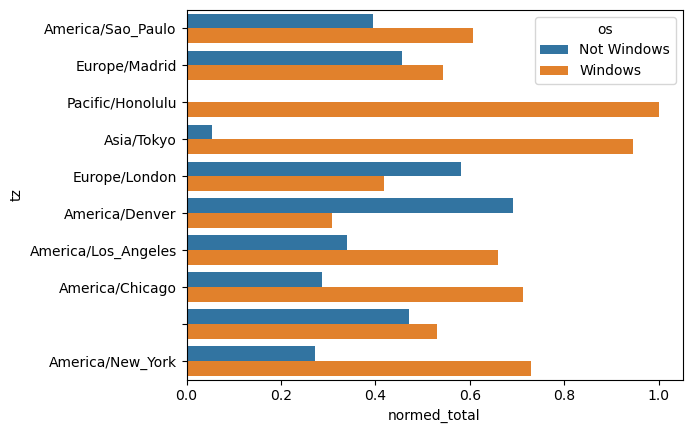

In [63]:
plt.show()  #  -> 총 숫자가 아닌, 각 나라별, windows와 windows아닌것의 비율을 나타낸 것.(win, not win의 합은 1)

In [64]:
# groupby와 transform 메서드를 이용해서 정규합 계산을 더 효율적으로 할 수도 있다.
g = count_subset.groupby('tz')

In [65]:
result2 = count_subset.total / g.total.transform('sum')

In [68]:
print(result2)

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
        ...   
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, Length: 20, dtype: float64


In [ ]:
# 여기까지 책.  아래는 추가 설명.

In [ ]:

# 설명해주자면 541페이지에 나와있는 함수 부분과 results 부분은 
# norm_total(group)이라는 함수를 통해서 normed_total이라는 row를 추가하는건데, results라는 새로운 데이터 프레임에 만든거야
# count_subset을 실행해보면 : normed_total이라는 row가 없지?

In [66]:
print(count_subset)

                   tz           os  total
0   America/Sao_Paulo  Not Windows   13.0
1   America/Sao_Paulo      Windows   20.0
2       Europe/Madrid  Not Windows   16.0
3       Europe/Madrid      Windows   19.0
4    Pacific/Honolulu  Not Windows    0.0
..                ...          ...    ...
15    America/Chicago      Windows  285.0
16                     Not Windows  245.0
17                         Windows  276.0
18   America/New_York  Not Windows  339.0
19   America/New_York      Windows  912.0

[20 rows x 3 columns]


In [67]:
# 하지만 results를 출력해보면 normed_total이라는 row가 있을거야 

In [70]:
print(results)

                   tz           os  total  normed_total
0   America/Sao_Paulo  Not Windows   13.0      0.393939
1   America/Sao_Paulo      Windows   20.0      0.606061
2       Europe/Madrid  Not Windows   16.0      0.457143
3       Europe/Madrid      Windows   19.0      0.542857
4    Pacific/Honolulu  Not Windows    0.0      0.000000
..                ...          ...    ...           ...
15    America/Chicago      Windows  285.0      0.712500
16                     Not Windows  245.0      0.470250
17                         Windows  276.0      0.529750
18   America/New_York  Not Windows  339.0      0.270983
19   America/New_York      Windows  912.0      0.729017

[20 rows x 4 columns]


In [ ]:
# 그렇기 때문에 count_subset에도 normed_total이라는 row를 추가해야하거든

In [72]:
g = count_subset.groupby('tz')
result2 = count_subset.total / g.total.transform('sum')
count_subset['normed_total'] = result2

# 이렇게 하면 count_subset에도 normed_total이 추가될거야

In [73]:
print(count_subset)

                   tz           os  total  normed_total
0   America/Sao_Paulo  Not Windows   13.0      0.393939
1   America/Sao_Paulo      Windows   20.0      0.606061
2       Europe/Madrid  Not Windows   16.0      0.457143
3       Europe/Madrid      Windows   19.0      0.542857
4    Pacific/Honolulu  Not Windows    0.0      0.000000
..                ...          ...    ...           ...
15    America/Chicago      Windows  285.0      0.712500
16                     Not Windows  245.0      0.470250
17                         Windows  276.0      0.529750
18   America/New_York  Not Windows  339.0      0.270983
19   America/New_York      Windows  912.0      0.729017

[20 rows x 4 columns]


In [74]:
# 이제 여기서 
sns.barplot(x='normed_total', y='tz', hue='os', data=count_subset)
# 을 실행하면 출력이 되는거지

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

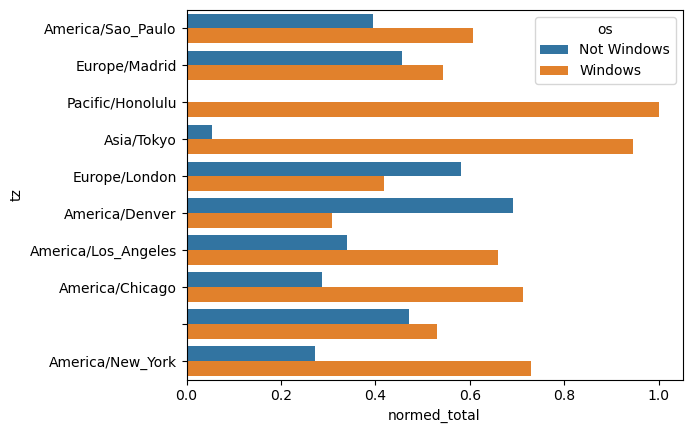

In [75]:
plt.show()

### 14.2 MovieLens의 영화 평점 데이터

In [3]:
# 이 자료는 영화에 대한 백만개의 영화 평점을 담고 있다.
# 이 데이터셋은 평점, 사용자 정보, 영화 정보의 3가지 테이블로 나뉘어 있는데, zip 파일의 압축을 풀고
# 각 테이블을 pandas.read_table 함수를 사용하여 DataFrame 객체로 불러오자.
import pandas as pd

# 출력되는 내용을 줄인다.
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/pydata-book-2nd-edition/datasets/movielens/users.dat', sep='::',
                     header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/pydata-book-2nd-edition/datasets/movielens/ratings.dat', sep='::',
                       header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/pydata-book-2nd-edition/datasets/movielens/movies.dat', sep='::',
                      header=None, names=mnames, encoding = 'ISO-8859-1')  # -> 그냥 하면 에러나서 뒤에 인코딩 (encoding = 'ISO-8859-1') 이거 붙여줘서 해결함

In [76]:
# DataFrame 객체에 데이터가 제대로 들어갔는지 확인하기 위해 파이썬의 리스트 분할 문법을 사용해서
# 첫 5개 로우 출력
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [77]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [78]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [79]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [80]:
# 나이와 직업은 실제 값이 아니라 그룹을 가리키는 코드 번호이며,
# 데이터셋에 있는 README 파일에 해당 코드에 대한 설명이 들어 있다.

In [81]:
# 모든 데이터를 하나의 테이블로 병합하여 계산하면 무척 쉽게 처리할 수 있다.
# pandas의 merge 함수를 이용해서 ratings 테이블과 users 테이블을 병합하고,
# 그 결과를 다시 movie 테이블과 병한한다.
# pandas는 병합이라는 두 테이블에서 중보되는 컬럼의 이름을 key로  사용한다.

data = pd.merge(pd.merge(ratings, users), movies)

In [82]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western
